<a href="https://colab.research.google.com/github/skml29/Trabajo-de-investigaci-n/blob/skml29-codes/Cylinder2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy.special as sc
from scipy.integrate import odeint

In [ ]:
pi = np.pi

In [ ]:
class ode:
    def __init__(self, m):
        self.m = m

    def __call__(self, z,t):
        return  2*z/(self.m**2-t**2 - z)

In [ ]:
class eqnp:
    def __init__(self, m, b):
        self.m = m
        self.b = b

    def __call__(self, w):
        return  (self.b-self.m)*sc.jv(self.m,w) + w*sc.jv(self.m+1,w)

In [ ]:
wmax = 12
ww = np.linspace(0, wmax, 1000) 
mmax = 5
val = []
for m in range(mmax):
    eq = eqnp(m,0)
    val.append(eq(ww))

In [ ]:
guessing = [[4,7,10],[2,5,9], [3,7,10], [4,8,11], [5.1, 9]]

In [ ]:
def p_start_eigenv(guess):
    mmax = len(guess)
    container = []
    for m in range(mmax):  
        eq = eqnp(m,0)
        p_eigv = []
        for st in guess[m]:
            val = fsolve(eq, [st])[0]
            p_eigv.append(val**2)
        container.append(p_eigv)         
    return container

In [ ]:
p_starting = p_start_eigenv(guessing) 
p_start_flat = [item for sublist in p_starting for item in sublist]
p_start_flat.sort()
p_start_flat

[3.3899577166718946,
 9.328363213747558,
 14.68197064212419,
 17.649988519749417,
 28.276371248725347,
 28.42428204737229,
 44.972222417793915,
 49.218456321694205,
 64.24401772794461,
 72.86869710635146,
 86.16288079626727,
 99.39028867558173,
 103.4994538951369,
 128.72999846510916]

In [ ]:
def p_eigenvalues(start):
    mmax = len(start)
    bmax = 8
    bb =  np.linspace(0, bmax, 2500) 
    pack =  []
    for m in range(mmax):
        container = []
        f = ode(m)
        for st in start[m]:
            egv = odeint(f , st, bb)
            container.append((bb,egv))
        pack.append(container)
    return pack

In [ ]:
p_pack = p_eigenvalues(p_starting)

In [ ]:
beta_max = pi

In [ ]:
def scaled1(b):
    b0 = b
    val = fsolve(lambda w: w- b*np.cosh(w)/np.sinh(w), [b0])[0]  
    return ((val)**2)

In [ ]:
def scaled2(b):
    b0 = b
    val = fsolve(lambda w: w- b*np.tanh(w), [b0])[0] 
    return ((val)**2)

In [ ]:
beta1 = np.arange(0.001, beta_max, 0.1 )
beta2 = np.arange(1.001, beta_max, 0.1)
s1 = [scaled1(b) for b in beta1]
s2 = [scaled2(b) for b in beta2]

In [ ]:
from scipy.interpolate import interp1d
sc1 = interp1d(beta1, s1, kind='cubic')
sc2 = interp1d(beta2, s2, kind='cubic')

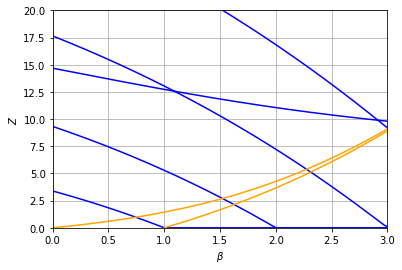

In [ ]:
fig, ax = plt.subplots()
for m in range(len(p_pack)):
    solutions = p_pack[m]
    for (xx,yy) in solutions: 
        ax.plot(xx, yy, color = "blue",  label=f"m ={m} ")
#ax.legend(loc='lower left', shadow=True, fontsize='x-large')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$Z$')
ax.set_title('', fontsize=20)
ax.plot(beta1, sc1(beta1), color = "orange",label='$sc_1(\omega)$')
ax.plot(beta2, sc2(beta2), color = "orange", label='$sc_2(\omega)$')
plt.xlim(0, 3)
plt.ylim(0, 20)
plt.grid()
plt.show()

In [ ]:
class eqnn:
    def __init__(self, m):
        self.m = m

    def __call__(self, w):
        return  self.m*sc.iv(self.m,w) + w*sc.iv(self.m+1,w)

In [ ]:
class oden:
    def __init__(self, m):
        self.m = m

    def __call__(self, z,t):
        return  2*z/(self.m**2-t**2 + z)

In [ ]:
mmax = 10
bmax = 10
t0 = 1/1000
n_pack = []
for m in range(mmax):
    bb = np.linspace(m + t0, bmax, 2500)
    st = 2*(m+1)*t0
    f = oden(m)
    egv = odeint(f , st, bb)
    n_pack.append((bb, egv))  

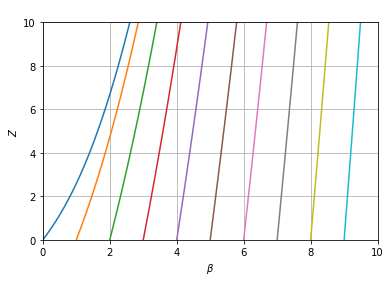

In [ ]:
fig, ax = plt.subplots()
mmax = len(n_pack)
m = 0
for (xx, yy) in n_pack:
    ax.plot(xx, yy,  label=f"m ={m} ")
    m = m+1
#ax.legend(loc='lower left', shadow=True, fontsize='x-large')
ax.set(xlabel=r'$\beta$', ylabel=r'$Z$', \
       title=' ')
    
#ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()
plt.show()

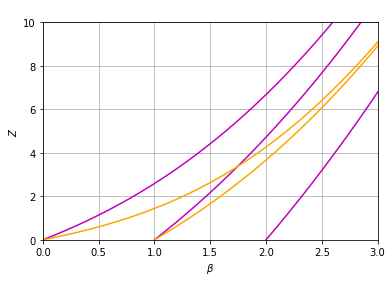

In [ ]:
fig, ax = plt.subplots()
mmax = len(n_pack)
m = 0
for (xx, yy) in n_pack:
    ax.plot(xx, yy, color = 'm',  label=f"m ={m} ")
    m = m+1
#ax.legend(loc='lower left', shadow=True, fontsize='x-large')
ax.set(xlabel=r'$\beta$', ylabel=r'$Z$', \
       title=' ')
ax.plot(beta1, sc1(beta1), color = "orange",label='$sc_1(\omega)$')
ax.plot(beta2, sc2(beta2), color = "orange", label='$sc_2(\omega)$')
#ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlim(0, 3)
plt.ylim(0, 10)
plt.grid()
plt.show()